(-0.5, 0.5)

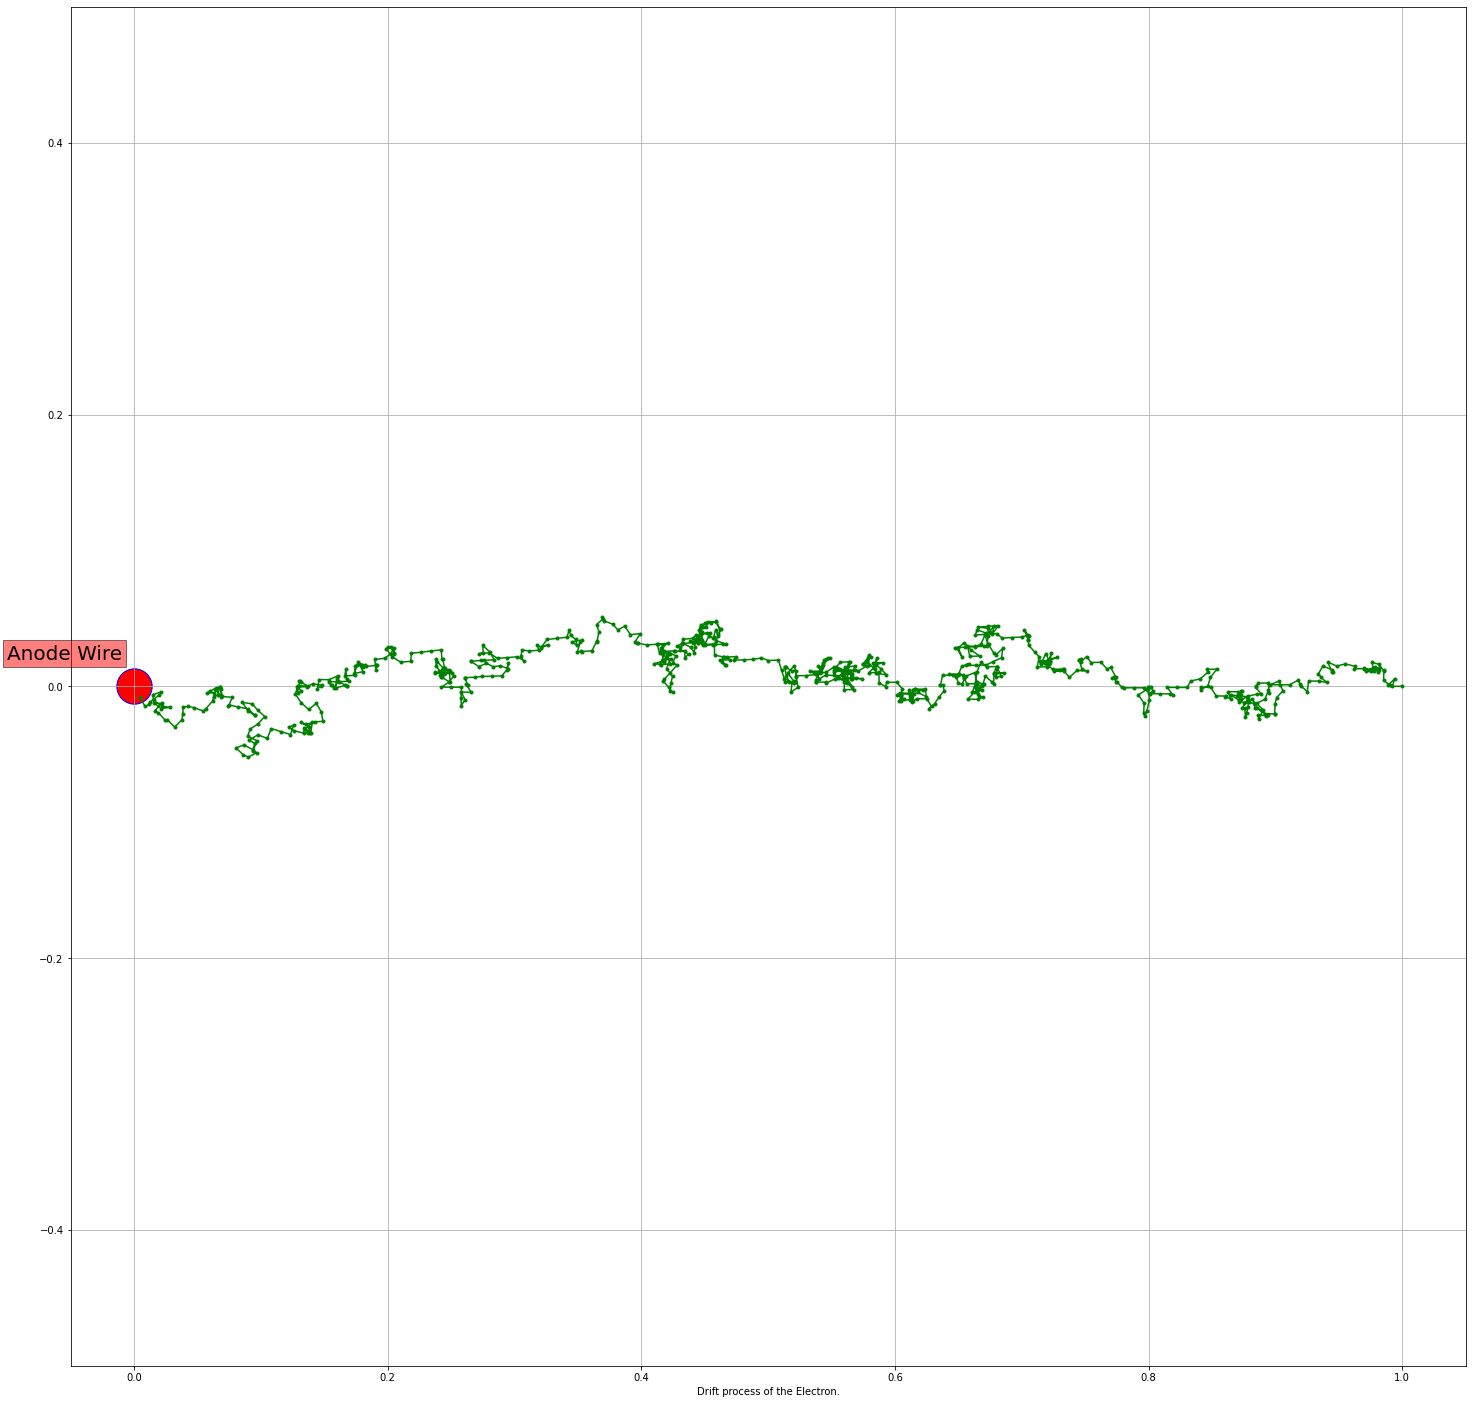

In [76]:
import math as m
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from mc import *
import random

# Initial condition for starting electron
# Position
r = 1 # mm
theta = 0               # Degrees
z = 0                   # mm
# Velocity vector direction and energy
psi = 90                # Degrees
cap_psi = 180           # Degrees
energy = 10             # eV
def position_next(r, theta, z, psi, cap_psi):
    r = r_next(r, psi, cap_psi)
    theta =  theta_next(theta, r, psi, cap_psi)
    z = z_next(z, psi)
    return [r, theta, z]

def velocity_position(energy,  psi, cap_psi):
    v_r_val = v_r(energy, psi, cap_psi)
    v_theta_val = v_theta(energy, psi, cap_psi)
    v_z_val = v_z(energy, psi)
    return [v_r_val,  v_theta_val,  v_z_val]

def velocity_next(energy,  psi, cap_psi):
    v_z_next_val = v_z_next(energy, psi)
    v_theta_next_val = v_theta_next(r, energy, psi, cap_psi)
    v_r_next_val = v_r_next(r, energy, psi, cap_psi)
    return [v_r_next_val,  v_theta_next_val,  v_z_next_val] 

def psi_cap_psi_next():
    return psi_next(r, energy, psi, cap_psi), cap_psi_next(r, energy, psi, cap_psi)
 
Position_list_final = [[r,theta,z]]

def MC_driver(r, theta, z, psi, cap_psi, energy):
    Velocity_list, Position_list = [], []
    rand_val = 0
    while (r > R_a and r < R_c):
        position_val = position_next(r,theta,z, psi,cap_psi)
        Position_list.append(position_val)
        velocity_val = [velocity_position(energy,  psi, cap_psi)]
        Velocity_list.append(velocity_val)
        rand_val = random.uniform(0,1)
        if rand_val < 0.15:          # No collision
            velocity_next_val = velocity_next(energy,  psi, cap_psi)
            psi, cap_psi = psi_cap_psi_next()
        else:
            psi, cap_psi = random.uniform(0,180), random.uniform(0,360)
        energy = energy_next(r, energy, psi, cap_psi)
        r, theta, z = position_val[0], position_val[1], position_val[2]
    return Position_list

Position_list_final.extend(MC_driver(r, theta, z, psi, cap_psi, energy))
x_list = [position_ele[0]*m.cos(position_ele[1]*m.pi/180) for position_ele in Position_list_final]
y_list = [position_ele[0]*m.sin(position_ele[1]*m.pi/180) for position_ele in Position_list_final]

plt.figure(figsize=(25,25))
#plt.title("Two dimensional display of a simulated drift process of one electron from starting point to Anode wire surface.")
plt.scatter(0, 0, s=1250, facecolors='red', edgecolors='blue')
plt.plot(x_list, y_list, '.-g')
plt.grid()
#plt.legend()
plt.xlabel("Drift process of the Electron.")
plt.text(-0.1, 0.02, 'Anode Wire', fontsize=20, bbox=dict(facecolor='red', alpha=0.5))
plt.ylim(-0.5,0.5)